# This notebook assesses the fit of the exponential decay model for each yield vs time curve

In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
%autoreload 2
from src.data.make_dataset import make_cat_dict,calc_reactor_metrics

In [5]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
fname = "Round 1 Predictions.txt"
catalysts = make_cat_dict(fname,raw_data_path=raw_dir)

Loading in reaction 002
Loading in reaction 003
Loading in reaction 004
Loading in reaction 005
Loading in reaction 006
Loading in reaction 007
Loading in reaction 008
Loading in reaction 009
Loading in reaction 010
Loading in reaction 011


In [6]:
#create fits
fits = [calc_reactor_metrics(cat) for cat in catalysts]

In [9]:
def sel_cat(rxn,tube,cats,fits):
    #returns data for a selected tube
    i = 0
    found = False
    for cat in cats:
        if cat["Reaction"] == rxn and cat["Tube"] == tube:
            found=True
            break
        else:
            i+=1
    t = np.asarray(cats[i]["Time Since Start"])
    Y = np.asarray(cats[i]["Conversion"])*np.asarray(cats[i]["Selectivity"])
    Y_pred = fits[i][1]*np.exp(-fits[i][0]*t)
    return i,t, Y, Y_pred
    

Y_0-240: -45.05602049664892
Y_0-240: 45.05602049664892


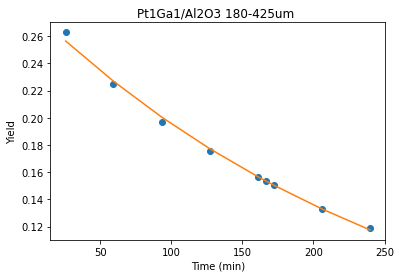

In [18]:
rxn = '24-003'
tube = 3
i,t,Y,Y_pred = sel_cat(rxn,tube,catalysts,fits)

print(f'Y_0-240: {fits[i][1]/fits[i][0]*(np.exp(-fits[i][0]*240)-np.exp(-fits[i][0]*0))}')
print(f'Y_0-240: {fits[i][1]/fits[i][0]*(1-np.exp(-fits[i][0]*240))}')

plt.plot(t,Y,"o")
plt.plot(t,Y_pred)
plt.title(f'{catalysts[i]["Catalyst"]}')
plt.xlabel("Time (min)")
plt.ylabel("Yield")
plt.show()